In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("../Data/Mall_Customers.csv",index_col="CustomerID")
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
df.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


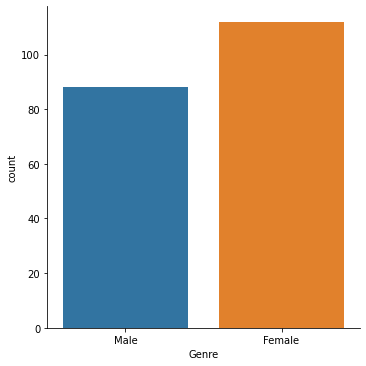

In [7]:
sns.catplot(data=df,x="Genre",kind='count')

In [8]:
df['Genre']=df['Genre'].map({"Male":1,'Female':0})
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [9]:
from sklearn.cluster import KMeans

In [13]:
k=[2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

In [14]:
ssd

[212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331505,
 51201.740785418966,
 44355.31351771352,
 40670.989962363215,
 37286.8997226606]

Text(0, 0.5, 'Intertia')

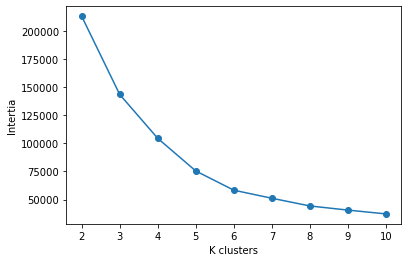

In [17]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Intertia")

In [19]:
model=KMeans(n_clusters=6)
model.fit(df)

KMeans(n_clusters=6)

In [20]:
model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 5, 3, 2, 0,
       2, 3, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 4, 0, 4, 1, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [21]:
model.n_iter_

6

In [22]:
model.cluster_centers_

array([[ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 44.31818182, 25.77272727, 20.27272727],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.43181818, 56.34090909, 53.70454545, 49.38636364]])

In [23]:
final=df
final["Labels"]=model.labels_
final.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,3
3,0,20,16,6,2
4,0,23,16,77,3
5,0,31,17,40,2


### Visualization of Clusters

In [24]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [29]:
pca_data=pca.transform(df)

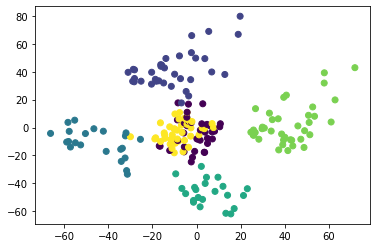

In [33]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=model.labels_)